# Tasca M9 T01

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import nltk
from wordcloud import WordCloud

In [2]:
#Ejecutar solo la primera vez
#nltk.download('all')

### - Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

El texto elegido es una review del libro "La mujer del viajero del tiempo" en Good Reads https://www.goodreads.com/book/show/18619684-the-time-traveler-s-wife.

In [3]:
review="""I'm only adding this book because it annoys me that it popped up on the "most popular reads." People, this book is terrible. Do yourself a favor and pretend you'd never heard of it.

My short answer is that it's just no good, the long version is in the following list, which I call "The Problems I Have With The Time-Traveler's Wife."

1. The author is indecisive. Rather than accepting that this is a science-fiction novel, she tries to write a social commentary, romance, and art and music novel all rolled into one.

There is so much name-dropping that it's distracting—classical music, entomology, poetry, romance languages, library science, the American punk scene, constructivist painters, you get the idea—they're all continually cropping up at the most inane times. What should give us a better understanding of the characters actually paints them as shells of people, identified only by superficialities. There is one completely pointless mention of a Moholy-Nagy poster that really annoyed me. I had five years of design school and while I know who Laszlo Moholy-Nagy is and how to correctly pronounce his name, I couldn't pick one of his paintings out of a lineup of his contemporaries, so I didn't even buy that this dude who has spent half of his life in limbo was some kind of expert.

2. The title character's entire life and family are so difficult to relate to that I immediately hated her. She grew up in a house that has books written about it (irritating architecture reference) and everyone must "dress" for dinner at her parents' house, as if this were a Brontë novel.

3. Her family employ five black servants. In a Christmas scene, for which the servants are unchained from the stove and allowed into the dining room, the cook actually toasts to "Miz Abshire."

This book was written in 2004! How can the "Mammy" have any place here? She isn't even the only racially stereotyped character in this book. The traveler's childhood downstairs neighbor, a grandmotherly woman he refers to as Kimmy, speaks in a broken English which could have been stolen directly from a hateful gold rush-era cartoon.

4. The book skips back and forth between the point-of-view of the title character and the time-traveler himself, but there is absolutely no difference in their voices. I think I actually got confused a few times about who was speaking.

5. The phrase, “she was pale under her makeup” was used three times.

6. The chapters dealing with infertility were completely unoriginal, boring, and emotionally flat.

7. Not only are conversations unnecessarily long, but they are often followed by page after page of internal dialogue as the characters rehash and analyze every point of said conversation.

Sorry this was so long, but this might be the worst book I've ever read and I'm really confused by all the good reviews."""

Usaremos el regextokenizer para coger solo las letras, no los puntos, las comas ni los números.

In [4]:
words = RegexpTokenizer('\w+').tokenize(review.lower())
words[:15]

['i',
 'm',
 'only',
 'adding',
 'this',
 'book',
 'because',
 'it',
 'annoys',
 'me',
 'that',
 'it',
 'popped',
 'up',
 'on']

In [5]:
frequency = nltk.FreqDist(words)
frequency

FreqDist({'the': 27, 'of': 14, 'a': 13, 'and': 13, 'i': 12, 'this': 9, 'is': 9, 'that': 8, 'in': 8, 'book': 6, ...})

Vemos que como palabras más usadas son las que se concen como stop words, preposiciones y conjunciones muy frecuentes en el lenguaje pero que no aportan significado.

### - Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

Empezaremos eliminando las stopwords (preposiciones, conjunciones, etc)

In [7]:
words=[element for element in words if element not in stopwords.words('english')]

In [8]:
frequency = nltk.FreqDist(words)
frequency

FreqDist({'book': 6, 'long': 3, 'traveler': 3, 'novel': 3, 'one': 3, 'times': 3, 'actually': 3, 'character': 3, 'people': 2, 'good': 2, ...})

Como podemos ver ahora que se han eliminado las stopwords las palabras más frecuentes son mucho más significativas que antes de hacerlo.

Crearemos una nube de palabras para ver cómo ha quedado

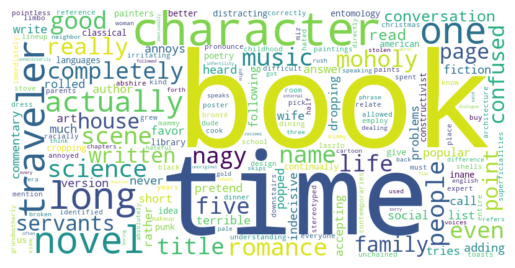

In [9]:
tmp=' '.join(words)
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate(tmp)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

A continuación haremos el stemming, que es el proceso de reducir cada palabra a su raíz. Esto permite agruparlas y ayuda con el rendimiento y la precisión del análisis de sentimiento. Una desventaja de este proceso es que puede agrupar palabras con significado muy diferente como por ejemplo "universidad" y "universo". Utilizaremos PorterStemmer que es de los más usados en lengua inglesa.

In [10]:
stemmed_words=[PorterStemmer().stem(element) for element in words]

In [11]:
stemmed_words[:15]

['ad',
 'book',
 'annoy',
 'pop',
 'popular',
 'read',
 'peopl',
 'book',
 'terribl',
 'favor',
 'pretend',
 'never',
 'heard',
 'short',
 'answer']

In [12]:
nltk.FreqDist(stemmed_words)

FreqDist({'book': 7, 'time': 5, 'charact': 5, 'long': 3, 'travel': 3, 'novel': 3, 'one': 3, 'actual': 3, 'annoy': 2, 'read': 2, ...})

Vemos que al agrupar por raíz ha cambiado la frecuencia de las palabras, por ejemplo 'charact' ha avanzado posiciones

### - Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

Primero volveremos a pasar la lista que hemos generado con el procesado a texto

In [13]:
processed_review = ' '.join(stemmed_words)

Usaremos el analizador de sentimiento Vader Sentiment Intensity Analyzer de la librería nltk

In [14]:
sentiment=SentimentIntensityAnalyzer().polarity_scores(processed_review)
sentiment

{'neg': 0.129, 'neu': 0.768, 'pos': 0.103, 'compound': -0.8176}

Si nos centramos en la puntuación global (compound) podemos decir que el analizador ha sabido percibir que el texto contenía sobretodo sentimiento negativo (completamente negativo sería -1). Cuando nos fijamos en la descomposición (neg, neu, pos) sorprende ver que obtiene la puntuación más alta en neutral, seguramente porque se trataba de una review argumentada, sin palabras muy exageradas o malsonantes. 